In [37]:
model_dir = "./modelscope_cache/models/AI-ModelScope/stable-diffusion-v1-5"
lora_dir = "./lora_output"

In [53]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

# 核心，加载模型
pipeline = DiffusionPipeline.from_pretrained(model_dir, use_safetensors=True, local_files_only=True, torch_dtype=torch.float16).to("cuda")

# 加速
pipeline.enable_model_cpu_offload()

# torch.compile 目前用于 Python 3.13.3+ , 不支持 3.14
# pipeline.unet = torch.compile(pipeline.unet, mode="max-autotune")

# 加速
pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

# 加载 Lora
pipeline.load_lora_weights(
    lora_dir,
    weight_name="checkpoint-950/pytorch_lora_weights.safetensors",
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

CLIPFeatureExtractor appears to have been deprecated in transformers. Using CLIPImageProcessor instead.
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/30 [00:00<?, ?it/s]

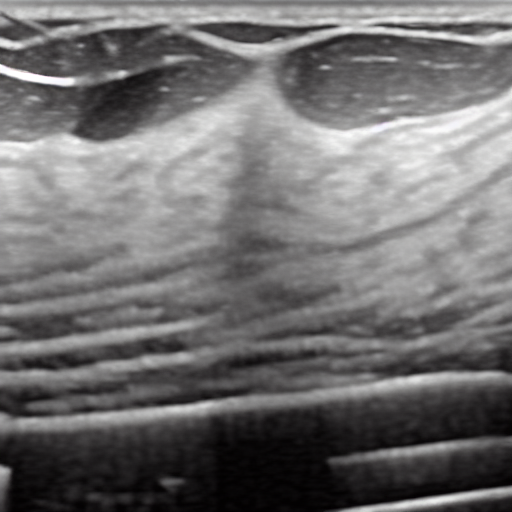

In [55]:
# 模型推理
pipeline("breast ultrasound, normal", num_inference_steps=30).images[0]